In [70]:
#Comments

In [55]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd

import math

In [187]:
ll

total 34960
-rw-r--r-- 1 grie8041  7662397 Jun 13 16:55 AmeC_BmeC_pen_5-12-23.ipynb
-rw-r--r-- 1 grie8041  7128052 May 18 15:40 baseLine_subtract_ssg_pen_16h.pkl
-rw-r--r-- 1 grie8041 13871626 Jun  1 14:19 baseLine_subtract_ssg_ssg2.pkl
-rw-r--r-- 1 grie8041     1337 May 18 15:37 blahb.ipynb
-rw-r--r-- 1 grie8041  4841174 Jun 26 16:44 Brendan-dead-cell-graphing.ipynb
-rw-r--r-- 1 grie8041  2291810 May 18 15:41 euonpJEEuoco_theo_4-18-23.ipynb
-rw-r--r-- 1 grie8041       16 May 18 15:18 README.md


In [56]:
data = '/mnt/ceph/grieshaber_lab/Brendan_data/26hpi/'

In [57]:

#imports all csv files in folder and concatonates the data sets from trackmate.
def combine_columns(row):
    return str(row['']) + str(row['B'])
import glob
def get_data(hpi):
    data = '/mnt/ceph/grieshaber_lab/Brendan_data/'+ hpi +'/'
    #print()
    df = pd.DataFrame()
    for filename in glob.glob(data + '*.csv'):
        #print(filename)
        data_01 = pd.read_csv(filename, sep=',')
       
        filename = filename.rsplit('/',1)[1]
        #print(filename)
    
        filename = filename.split('.')[0]
        #print(filename)
        
        hpiString = filename.split('_')[1]
        #print(hpiString)
        
        inclusion = filename.split('_')[2]
        #print(inclusion)
        
        
        data = data_01[['Spot_ID','Track_ID','Frame','X', 'Y', 'Channel_1', 'Channel_2', 'Channel_3', 'Inclusion']]
        df_temp = pd.DataFrame()
        df_temp = df_temp.append(data,  ignore_index=True)
        df_temp['time'] = int(hpiString)
        df_temp['Sample_ID'] = df_temp['Track_ID'].astype(str) + df_temp['Inclusion'].astype(str)
        df= pd.concat([df, df_temp], ignore_index=True)
        #df = df.append(data,  ignore_index=True)
        #df['Time'] = int(hpiString)
        #df['Sample_ID'] = int(inclusion)
    return df

In [58]:
A_df_12 = get_data('12')
A_df_14 = get_data('14')
A_df_16 = get_data('16')
A_df_18 = get_data('18')
A_df_20 = get_data('20')
A_df_22 = get_data('22')
A_df_24 = get_data('24')
A_df_26 = get_data('26')


In [190]:
B_df_18 = get_data('18b')
B_df_22 = get_data('22b')
B_df_24 = get_data('24b')
B_df_26 = get_data('26b')

In [59]:
# Create dataframe of maximum expression of individual cells
def find_max(df):
    full_max_df = None
    for track in df['Sample_ID'].unique():
        
        this_df = df[df['Sample_ID'] == track]
        max_chan1 = this_df['Channel_1'].max()
        #print(max_chan1)
        this_df = this_df[this_df['Channel_1'] == max_chan1]
        
        if full_max_df is None:
            full_max_df = this_df.copy(deep=True)
        else:
            full_max_df = pd.concat([full_max_df, this_df])
    return full_max_df

In [63]:
A_max_df_12 = find_max(A_df_12)
A_max_df_14 = find_max(A_df_14)
A_max_df_16 = find_max(A_df_16)
A_max_df_18 = find_max(A_df_18)
A_max_df_20 = find_max(A_df_20)
A_max_df_22 = find_max(A_df_22)
A_max_df_24 = find_max(A_df_24)
A_max_df_26 = find_max(A_df_26)

In [193]:
B_max_df_18 = find_max(B_df_18)
B_max_df_22 = find_max(B_df_22)
B_max_df_24 = find_max(B_df_24)
B_max_df_26 = find_max(B_df_26)

In [61]:
def color(df):
    color_df = None
    red= 'red'
    blue= 'blue'
    for spot in df['Sample_ID']:
        this_df = df[df['Sample_ID'] == spot]
        #print(this_df)
        ch3 = this_df.iloc[0,7]
        if ch3 >= 400 :
            #print('bonk')
            this_df['color'] = red
        #print(this_df)
        if int(ch3) < 400 :
            this_df['color'] = blue        
        if color_df is None:
            color_df = this_df.copy(deep=True)
            #print('first')
        else:
            color_df = pd.concat([color_df, this_df])
            #print('please')
    return color_df

In [196]:
B_final_18 = color(B_max_df_18)
B_final_22 = color(B_max_df_22)
B_final_24 = color(B_max_df_24)
B_final_26 = color(B_max_df_26)

/mnt/ceph/grie8041/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/mnt/ceph/grie8041/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [65]:
A_final_12 = color(A_max_df_12)
A_final_14 = color(A_max_df_14)
A_final_16 = color(A_max_df_16)
A_final_18 = color(A_max_df_18)
A_final_20 = color(A_max_df_20)
A_final_22 = color(A_max_df_22)
A_final_24 = color(A_max_df_24)
A_final_26 = color(A_max_df_26)

/mnt/ceph/grie8041/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/mnt/ceph/grie8041/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [139]:
# Save maximum expression individual cell data to pickle file.

full_max_df.to_pickle("DAPI_Max_intensity_cell.pkl")

In [140]:
# Import baseline subtracted pickle file into Pandas dataframe.

full_max_df = pd.read_pickle("DAPI_Max_intensity_cell.pkl")

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
max_df_22

Spot_ID  Track_ID  Frame           X            Y    Channel_1  \
3        39261         2   20.0  479.759468   682.096398   332.212670   
14       39391         6   23.0  497.305120   622.373176   323.027149   
18       38894         8   21.0  415.090168   428.261488   309.013575   
20       38929         9   21.0  557.717030   532.058212   274.624434   
27       39219        11   20.0  543.779023   580.239167   319.244344   
38       39002        12   21.0  462.539426   710.786550   393.271493   
41       39025        14   22.0  560.734550   426.646170   273.285068   
47       39028        15   22.0  587.130849   431.633026   292.262443   
52       39305        17   23.0  458.703359   447.832437   324.764706   
57       38902        18   21.0  415.242804   457.955641   266.615385   
67       39310        19   23.0  499.089028   459.647677   276.253394   
79       39315        20   23.0  550.816576   465.989050   310.140271   
87       39044        21   22.0  432.482045   469.719466   324.090498   
97       39183        22   20.0  447.293028   472.907315   268.393665   
106      39320        24   23.0  514.742347   478.893668   308.171946   
113      39050        25   22.0  459.266153   485.758084   293.162896   
124      39488        26   24.0  592.160100   486.046225   293.447964   
143      39052        27   22.0  395.016447   486.757021   324.597285   
154      38917        28   21.0  551.341581   489.347497   261.751131   
171      39056        29   22.0  539.696263   495.895403   280.963801   
181      39332        31   23.0  484.420562   501.334227   284.588235   
197      39194        32   20.0  559.121230   508.452668   255.244344   
211      38926        33   21.0  528.607774   518.644995   328.470588   
220      39068        34   22.0  585.968036   525.409015   257.221719   
228      38936        36   21.0  522.818014   541.970351   290.230769   
236      39081        37   22.0  544.189122   555.993299   310.325792   
242      39526        38   24.0  477.028797   559.581173   325.262443   
265      38943        39   21.0  559.722234   567.714329   317.601810   
268      39531        40   24.0  453.250061   574.252162   283.212670   
283      39090        41   22.0  493.667427   579.369042   311.484163   
294      38948        42   21.0  522.542990   580.346400   302.542986   
299      39372        43   23.0  474.260489   583.349952   345.343891   
315      39374        45   23.0  420.859422   592.418846   297.855204   
327      39543        46   24.0  401.610607   601.689942   299.303167   
333      39099        47   22.0  433.622926   600.270741   260.126697   
346      38959        48   21.0  512.428839   602.775951   312.950226   
350      39382        49   23.0  490.265891   604.778119   341.941176   
355      38964        51   21.0  568.983567   611.842862   342.841629   
366      39110        53   22.0  524.395894   618.869886   284.909502   
375      39241        55   20.0  543.031464   623.499577   278.475113   
382      38974        57   21.0  490.126594   637.579180   341.081448   
387      38978        58   21.0  466.268273   651.081055   320.325792   
393      39249        59   20.0  525.774405   651.926261   340.719457   
400      39124        61   22.0  550.882874   657.374023   373.348416   
414      39254        62   20.0  507.540294   671.716311   321.316742   
423      38987        63   21.0  541.637083   674.073560   367.144796   
433      39741        64   26.0  455.150722   680.424510   381.561086   
438      39140        66   22.0  508.785474   704.066181   365.909502   
446      39152        67   22.0  424.427009   738.374477   291.185520   
458      39339        68   23.0  406.836195   516.441414   313.669683   
468      39688        69   26.0  485.737937   539.819186   331.895928   
484      39686        70   26.0  429.067603   538.561540   327.040724   
490      39523        72   24.0  593.365527   555.153616   357.176471   
503      38940        73   21.0  510.084328   557.722364   304.45

In [27]:
# Set threshold for identification of RBs based on DAPI and euoprom-mNGLVA expression.

#DAPIUNT22 = full_max_df.query('Construct == "DAPIUNT" and Time == "22" and TOTAL_INTENSITY_CH1 >0 and TOTAL_INTENSITY_CH2 >0 and TOTAL_INTENSITY_CH3 >0')

In [66]:
def plot(df):
    with plt.style.context('seaborn-white'):
        sns.color_palette()
        fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
        ax1 = sns.scatterplot(data=df, x="Channel_1", y='Channel_2', ax=ax1, hue='color', alpha=0.5)
        ax2 = sns.scatterplot(data=df, x="Channel_2", y='Channel_3', ax=ax2, hue='color', alpha=0.5)
        
        ax1.legend_.remove()
        ax2.legend_.remove()
       #
        ax1.set_ylim([100, 10000])
        ax2.set_ylim([100, 10000])
     #
        ax1.set_xlim([100, 10000])
        ax2.set_xlim([100, 10000])
    #
        #ax1.yaxis.label.set_visible(False)
        #ax2.yaxis.label.set_visible(False)
    #
        ax1.set_ylabel('Channel 2', fontsize=12)
        ax2.set_ylabel('Channel 3', fontsize=12)
    #
        ax1.set_xlabel('Channel 1', fontsize=12)
        ax2.set_xlabel('Channel 2', fontsize=12)
    #
        #ax1.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
        #ax2.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
       
        ax1.set_xscale('log')
        ax2.set_xscale('log')
        #
        ax1.set_yscale('log')
        ax2.set_yscale('log')
        
        #ax1.arrow(0, 150000, 2800000, 0, color=c[8], lw=2, alpha=1, ls='-')
        #ax2.arrow(0, 150000, 2800000, 0, color=c[8], lw=2, alpha=1, ls='-')
        
        #ax1.arrow(80000, 0 ,0, 2800000, color=c[8], lw=2, alpha=1, ls='-')
        #ax2.arrow(80000, 0 ,0, 2800000, color=c[8], lw=2, alpha=1, ls='-')
        
        fig.set_size_inches(8, 4)
        fig.tight_layout()
        #plt.savefg('ASciELVA.pdf')

<IPython.core.display.Javascript object>


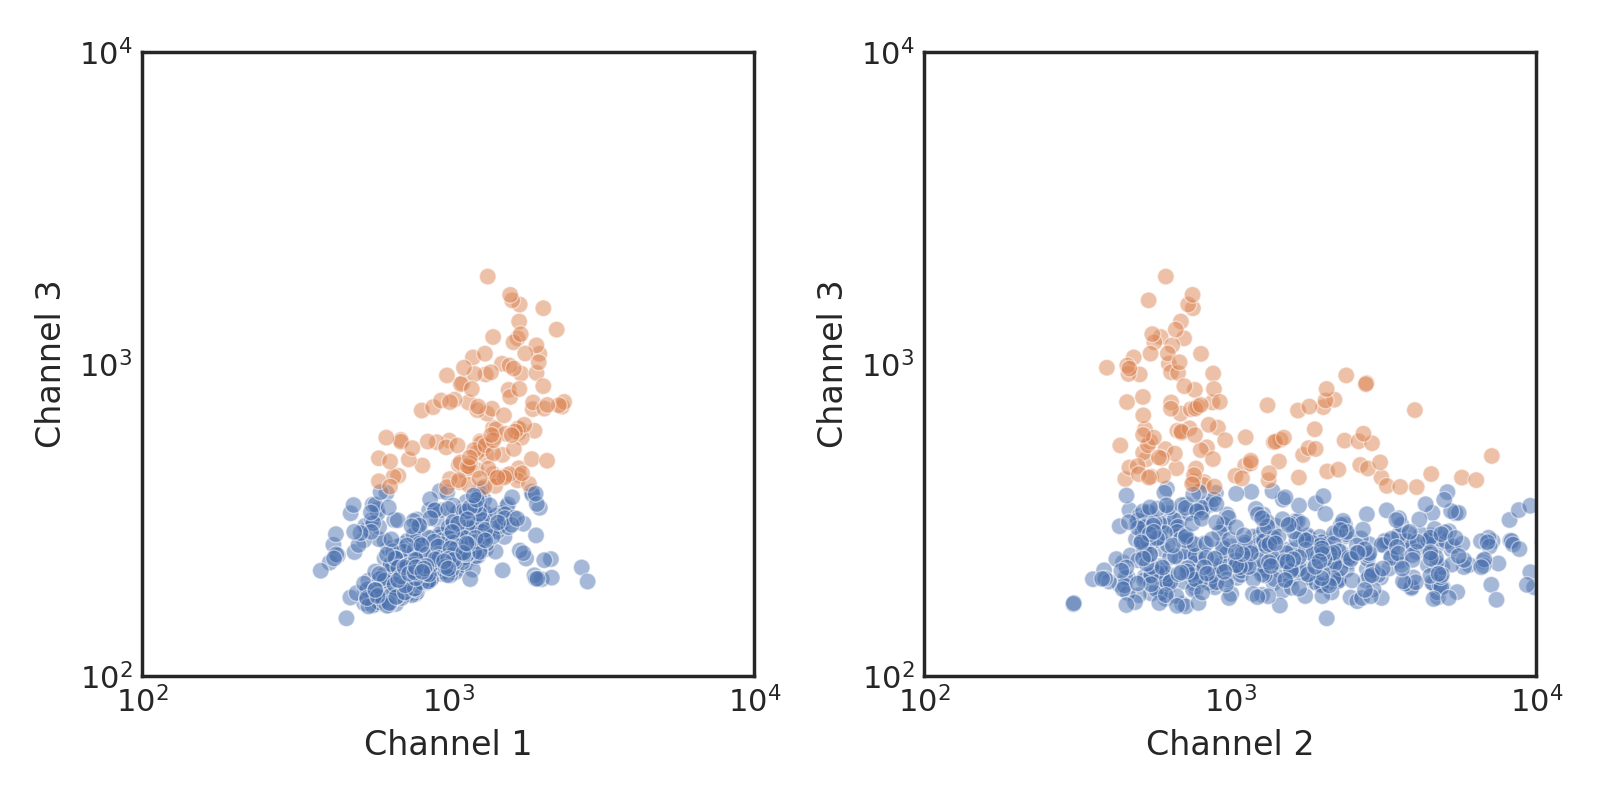

In [200]:
plot(B_final_26)

<IPython.core.display.Javascript object>


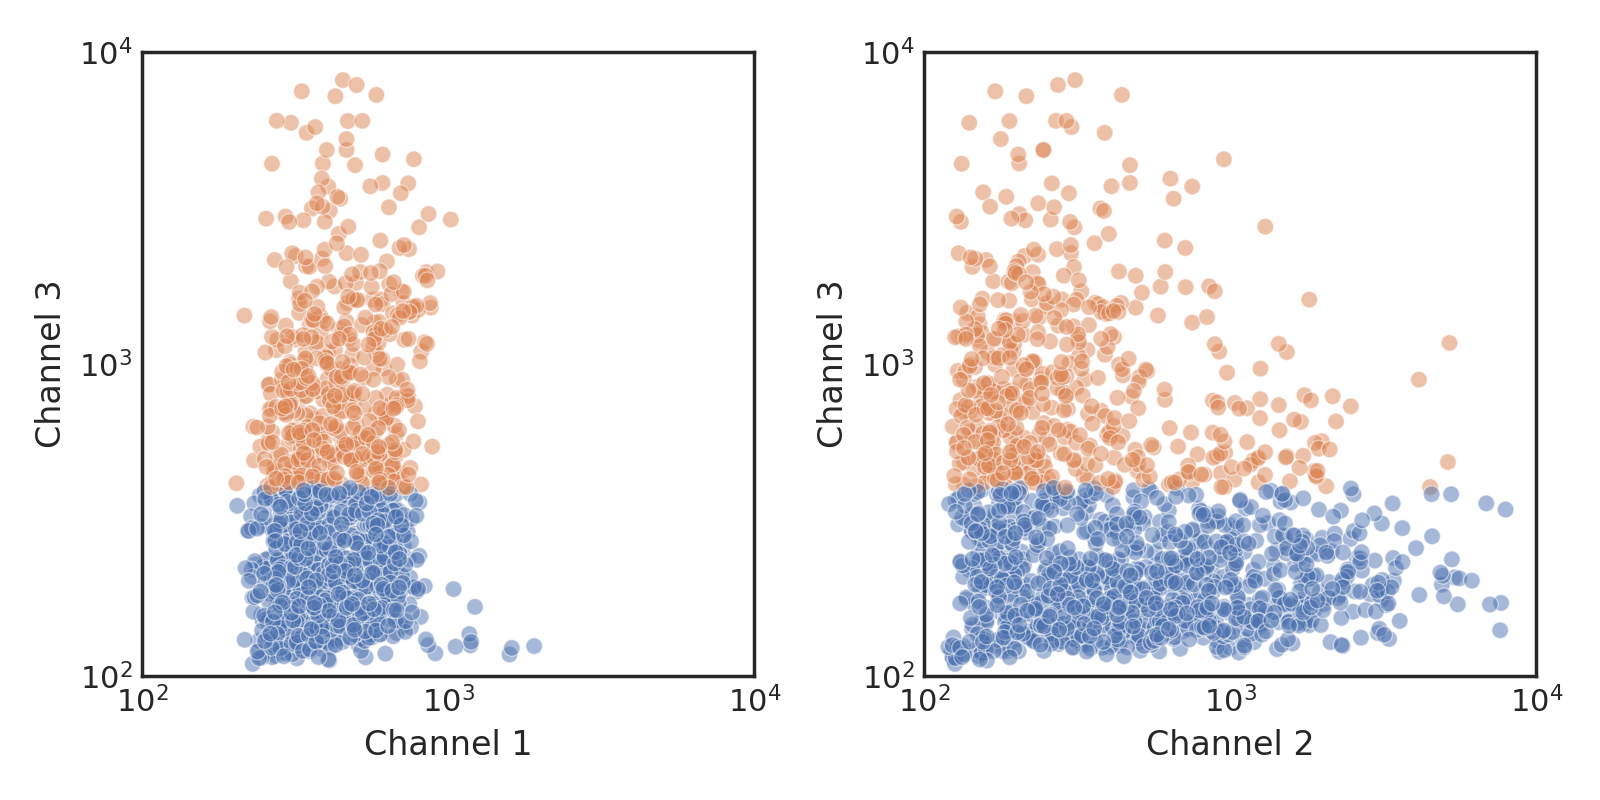

In [178]:
plot(final_22)

<IPython.core.display.Javascript object>


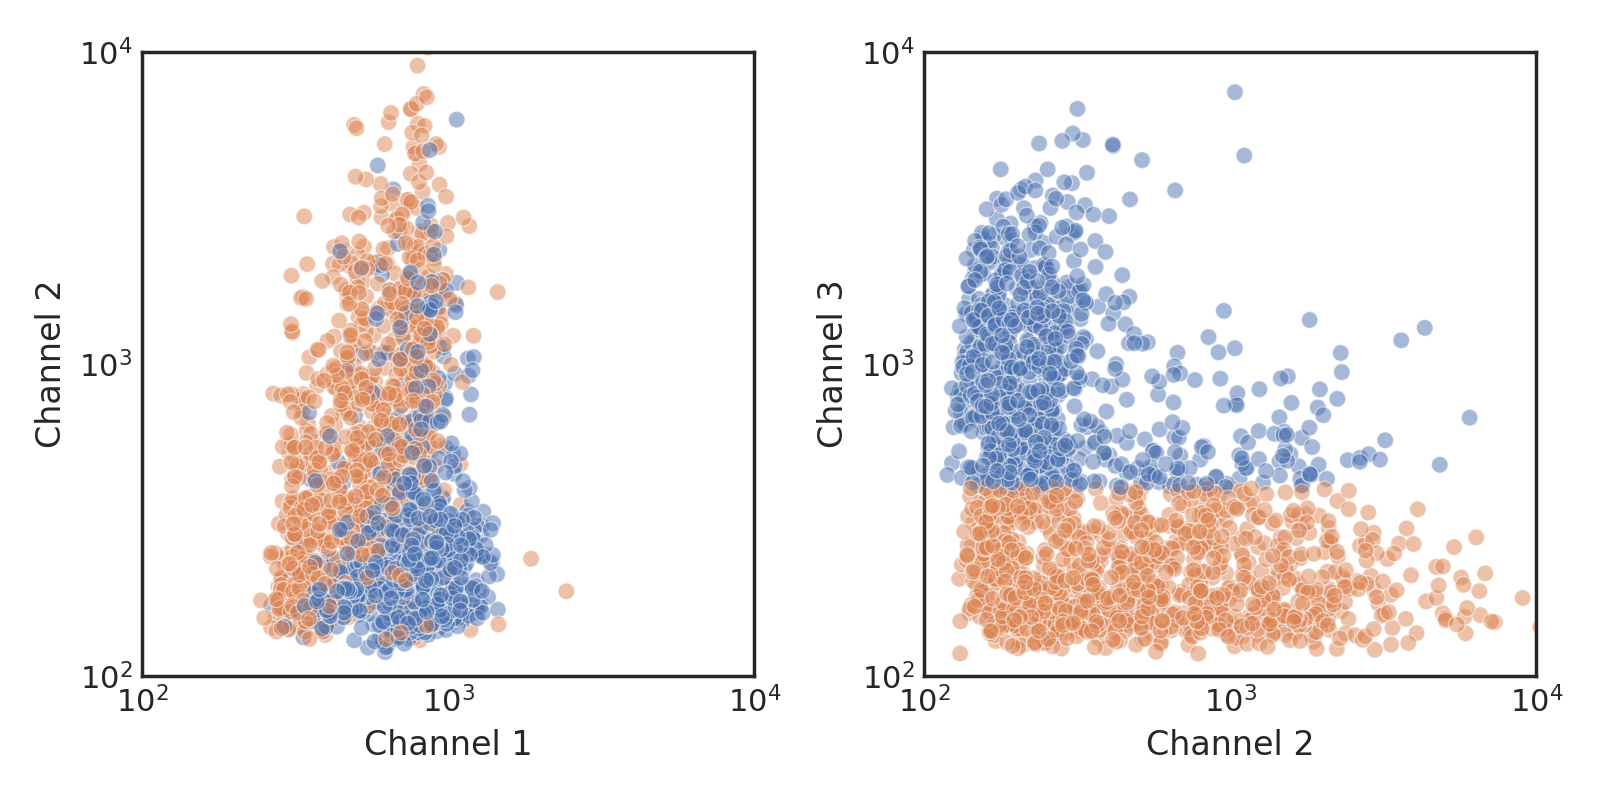

<IPython.core.display.Javascript object>


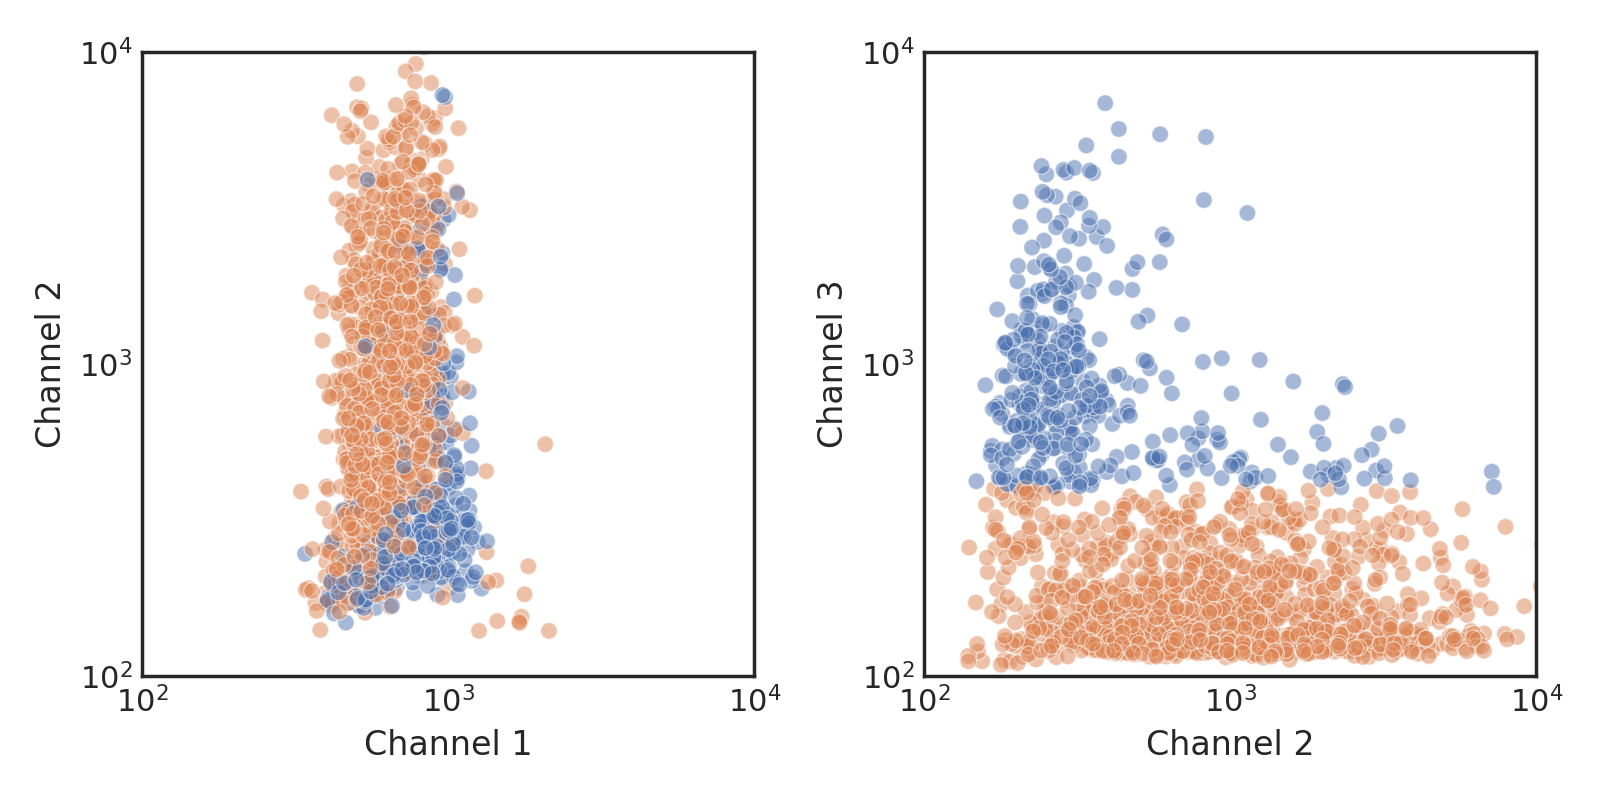

<IPython.core.display.Javascript object>


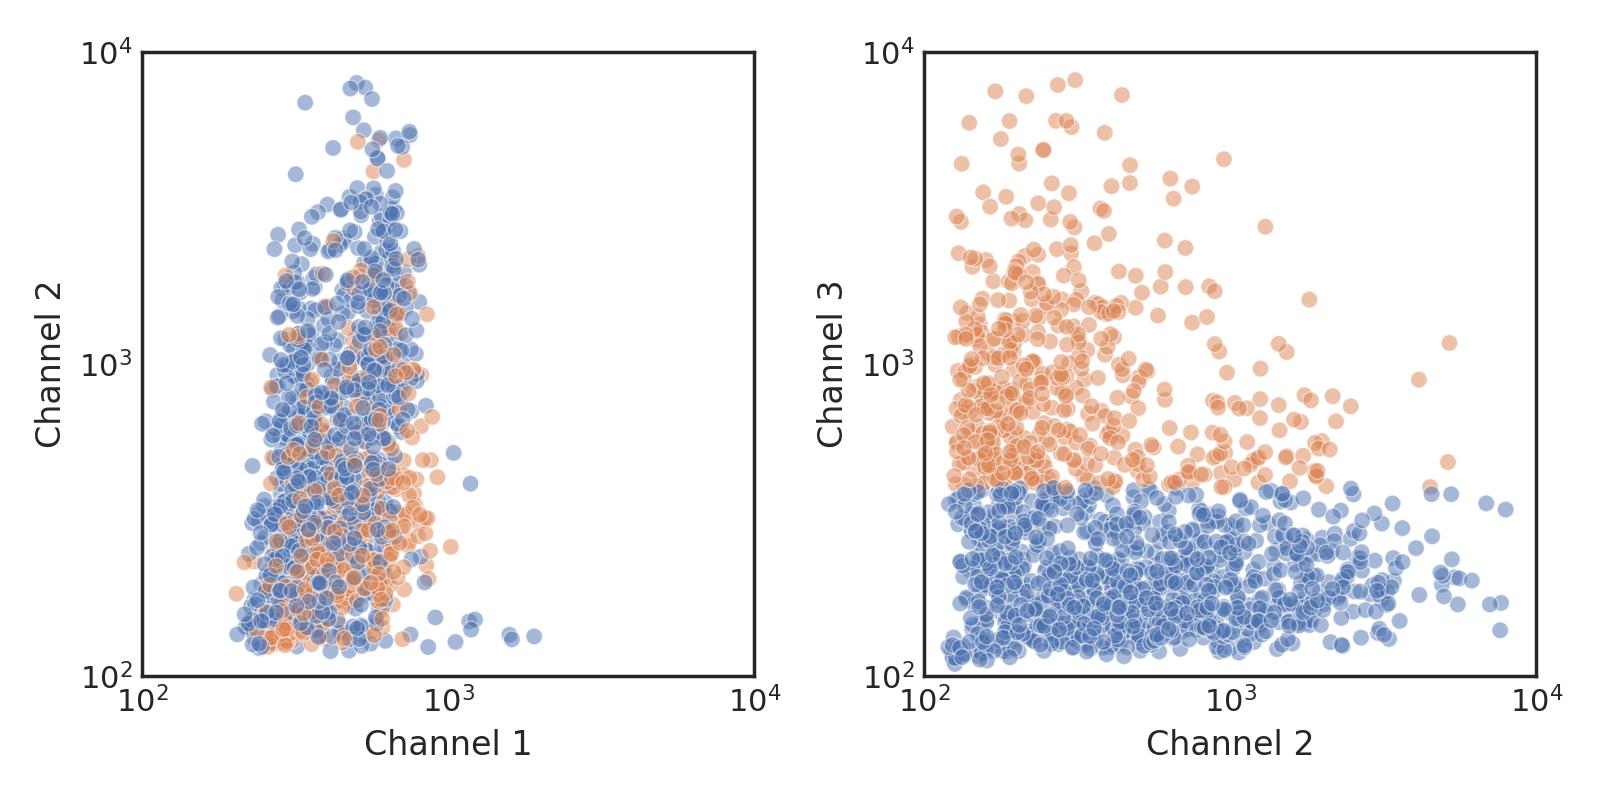

<IPython.core.display.Javascript object>


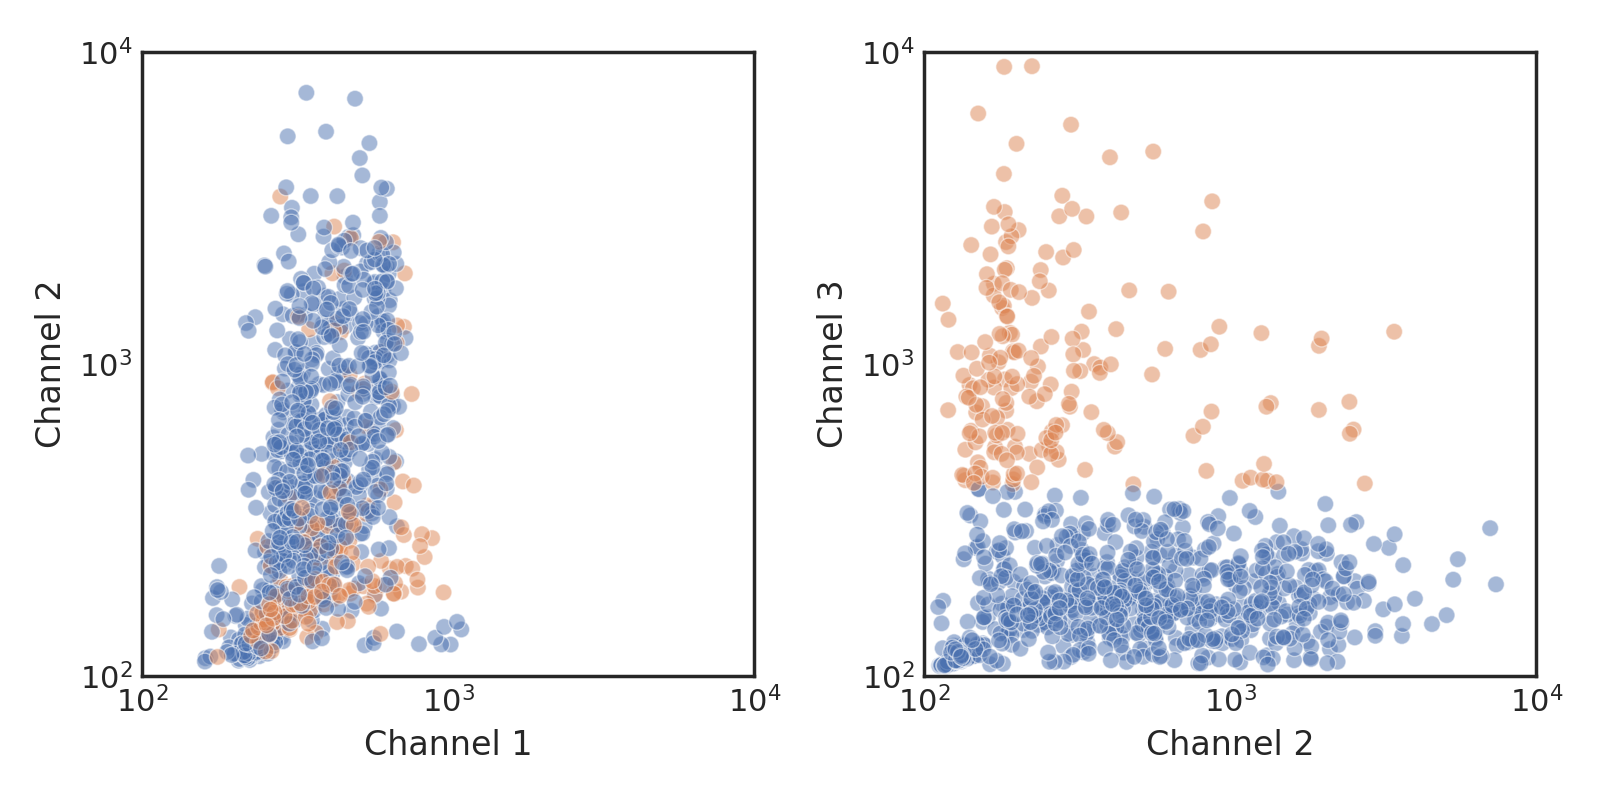

<IPython.core.display.Javascript object>


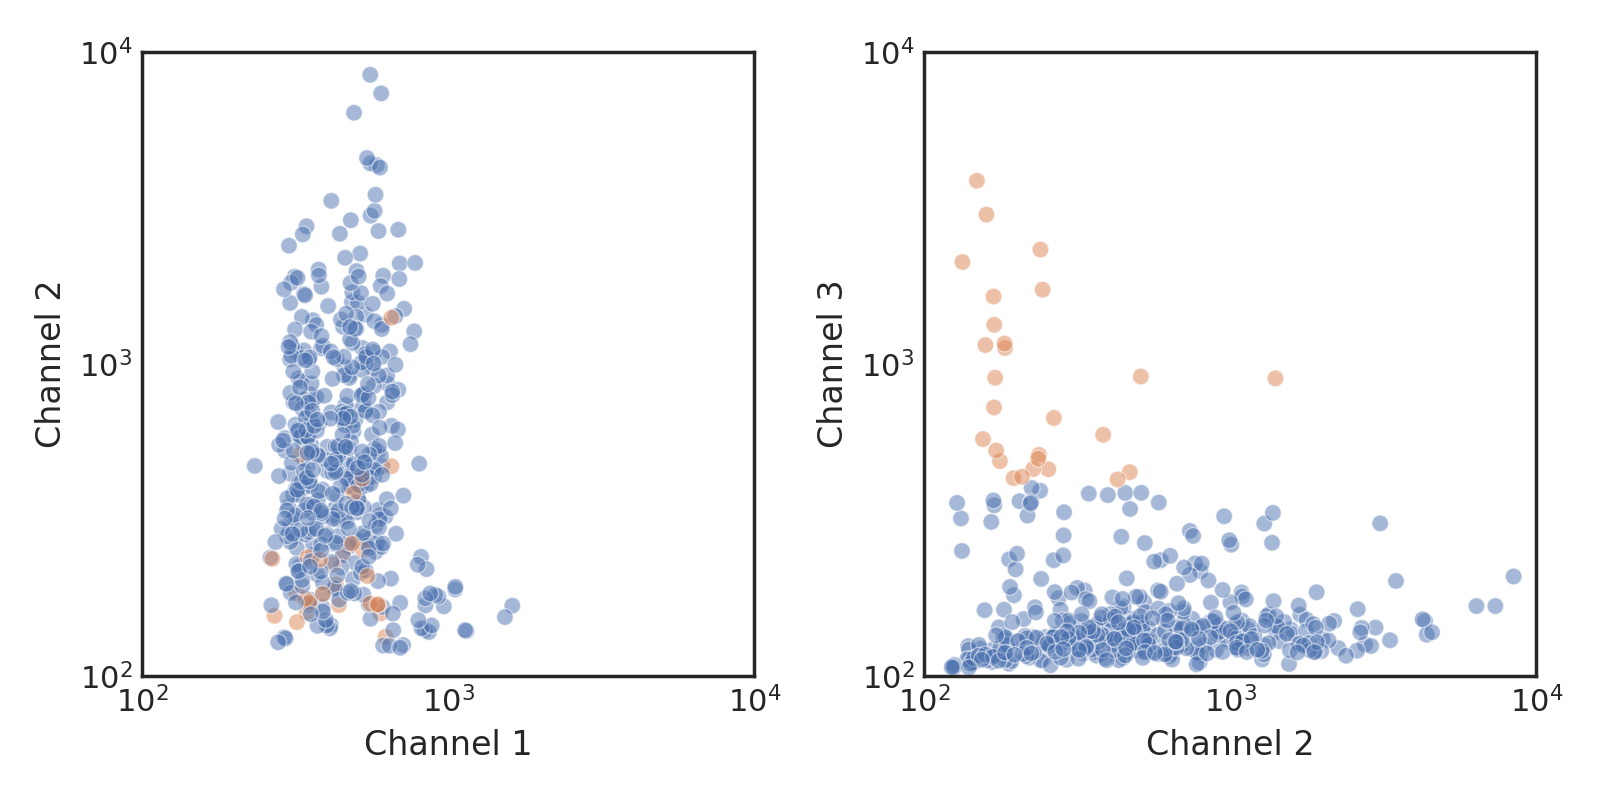

<IPython.core.display.Javascript object>


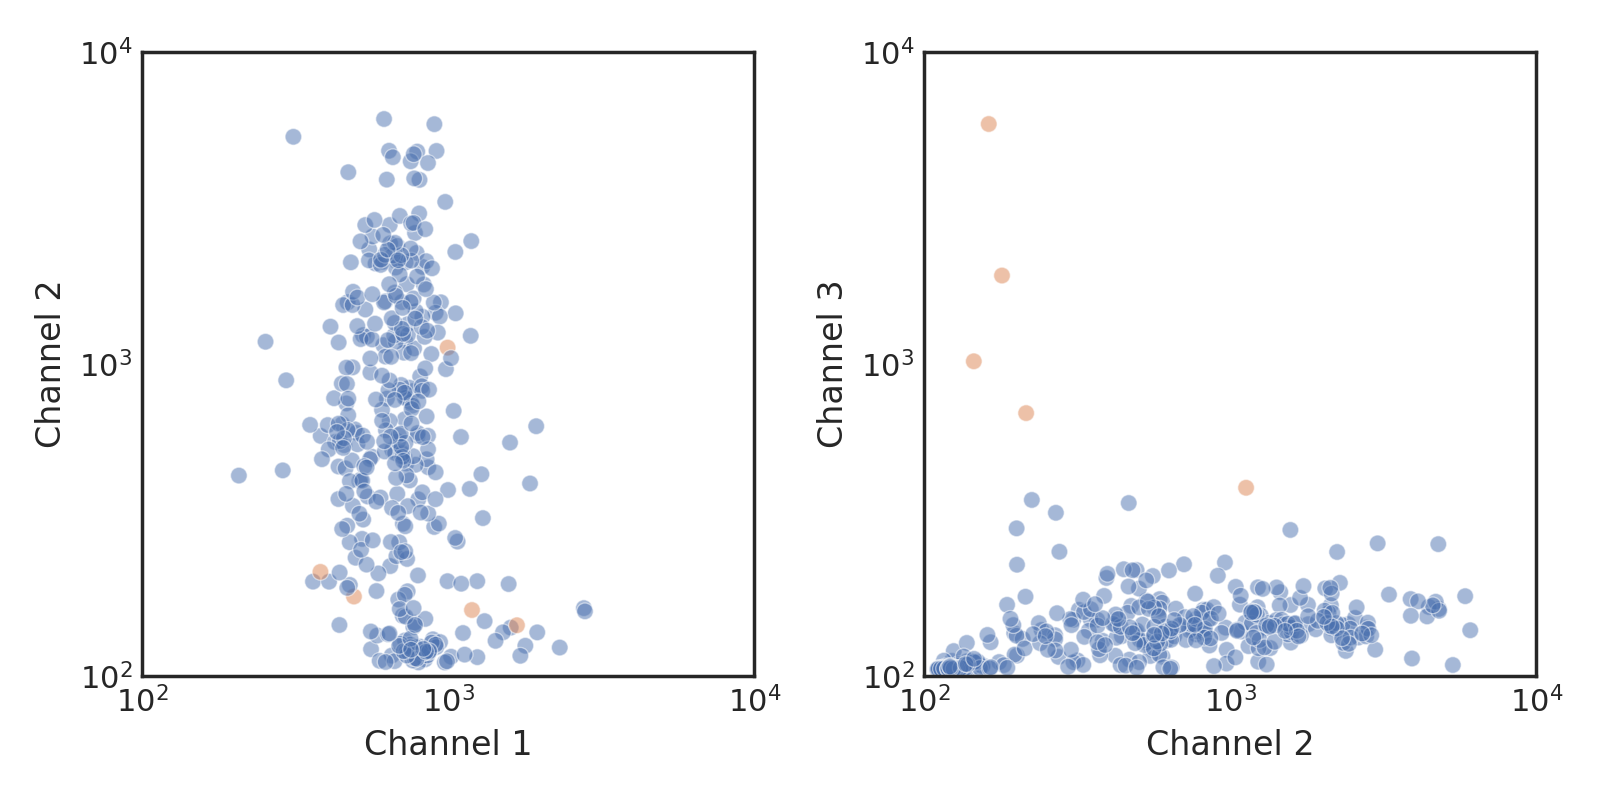

<IPython.core.display.Javascript object>


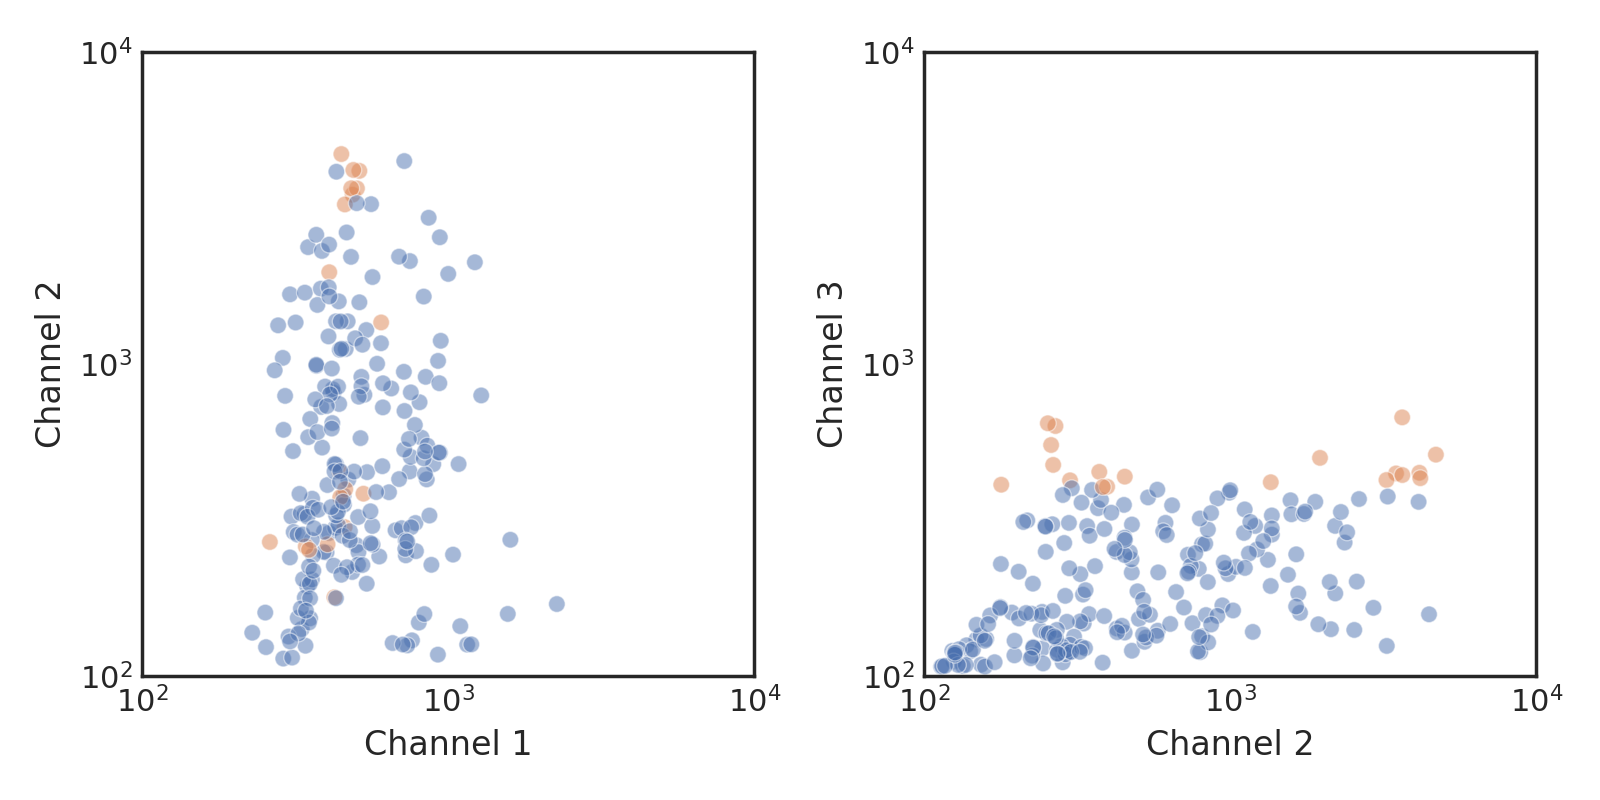

<IPython.core.display.Javascript object>


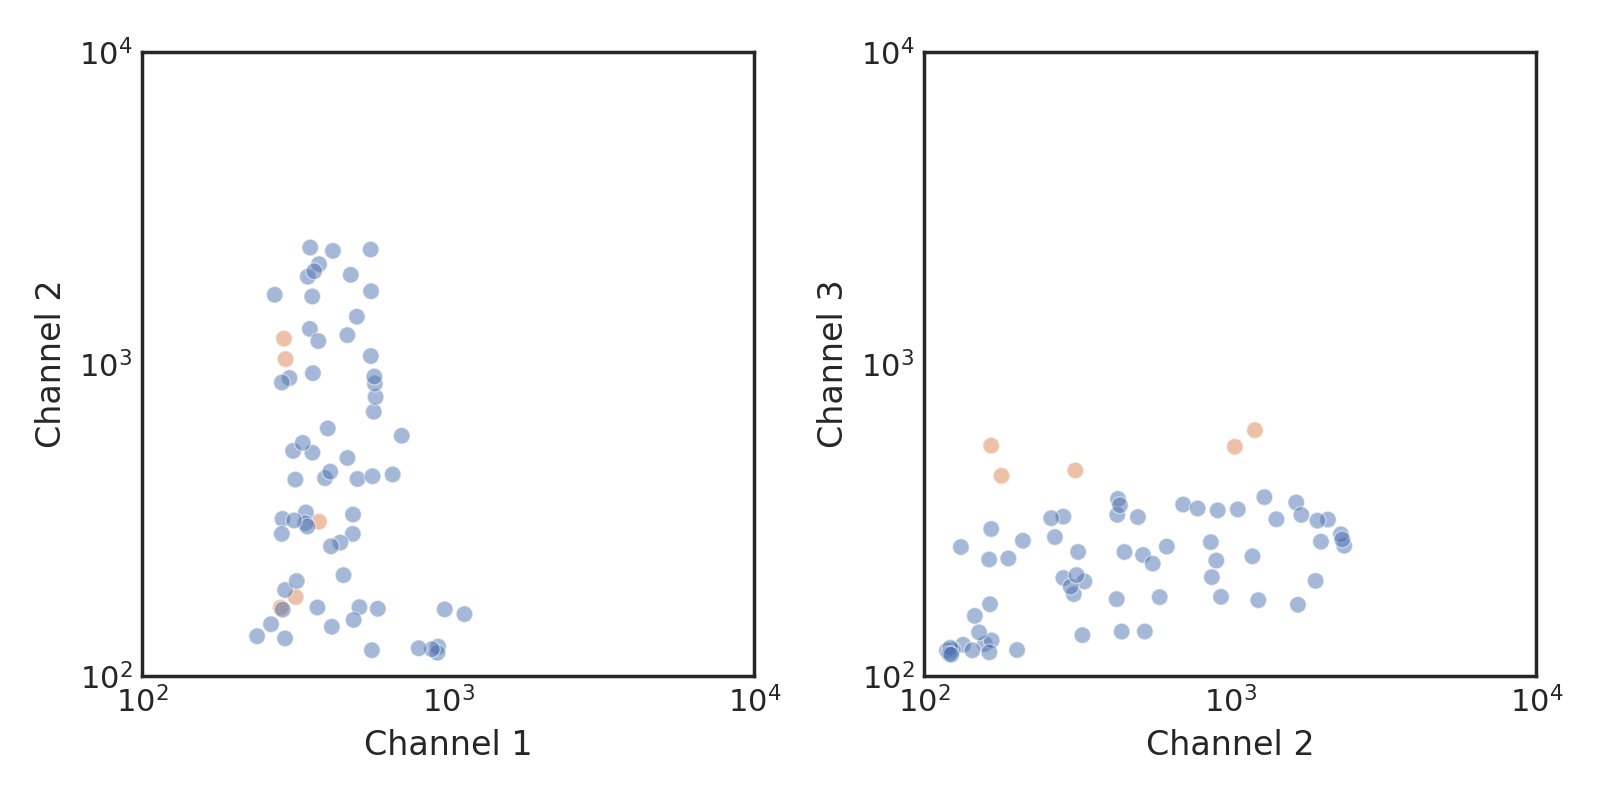

In [67]:
plot(A_final_26)
plot(A_final_24)
plot(A_final_22)
plot(A_final_20)
plot(A_final_18)
plot(A_final_16)
plot(A_final_14)
plot(A_final_12)

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
def PCA_run(df):
    selected_columns = ['Channel_1', 'Channel_2', 'Channel_3']  # Replace with the names of your desired columns
    selected_df = df[selected_columns]
    scaler = StandardScaler()
    selected_df_scaled = scaler.fit_transform(selected_df)
    pca = PCA(n_components=2)  # Specify the number of components you want to retain
    pca_result = pca.fit_transform(selected_df_scaled)
    df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    return df_pca
    #plt.scatter(df_pca['PC1'], df_pca['PC2'])
    #plt.xlabel('Principal Component 1')
    #plt.ylabel('Principal Component 2')
    #plt.title('PCA')
    #plt.show()

In [50]:
df=PCA_run(B_final_18)

<IPython.core.display.Javascript object>


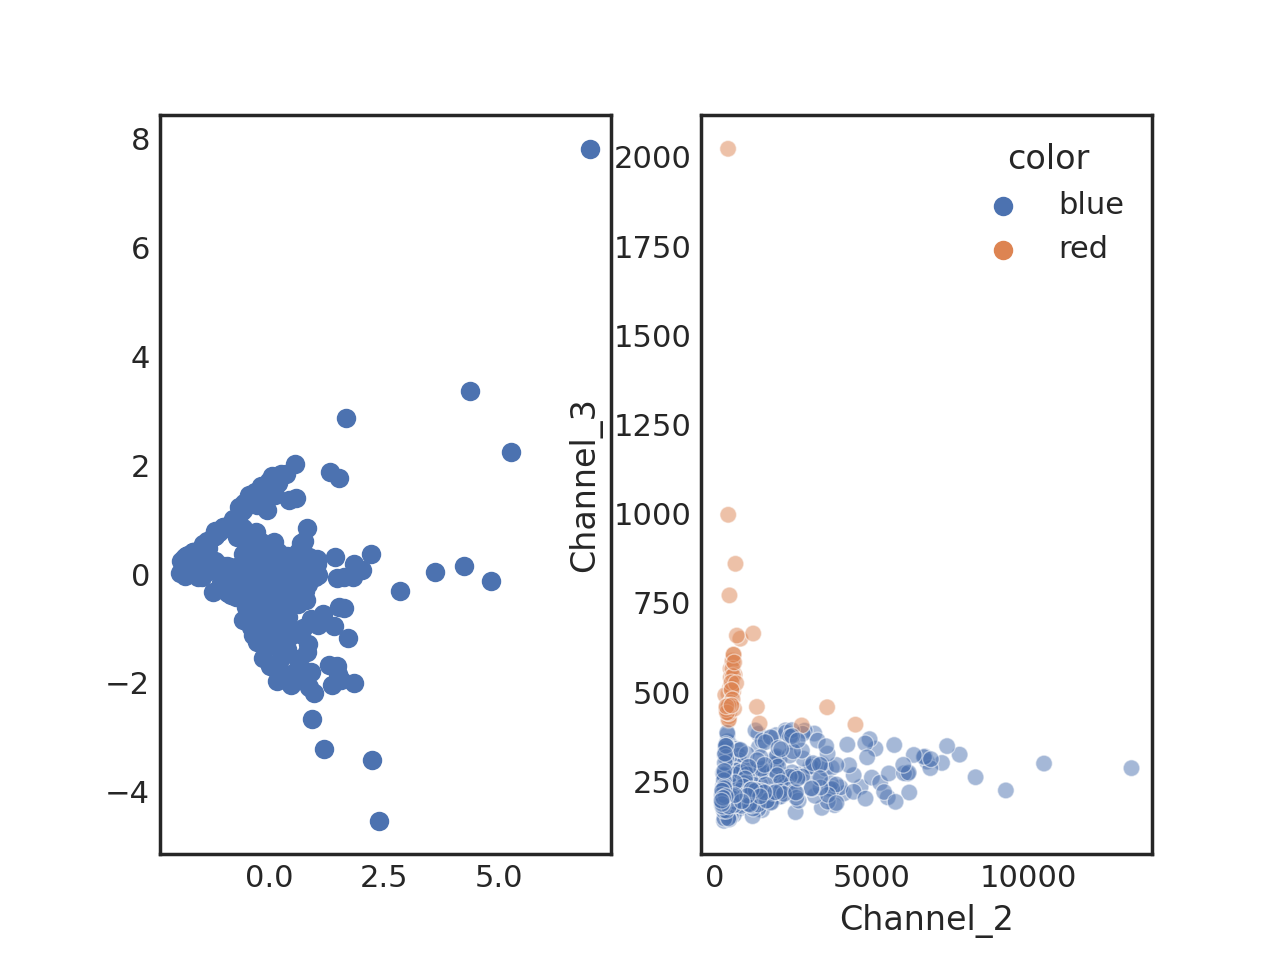

In [52]:
with plt.style.context('seaborn-white'):
    sns.color_palette()
    fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
    ax1.scatter(df['PC1'], df['PC2'])
   # ax1 = sns.scatterplot(data=df, x="PC1", y='PC2', ax=ax1, hue='color', alpha=0.5)
    ax2 = sns.scatterplot(data=B_final_18, x="Channel_2", y='Channel_3', ax=ax2, hue='color', alpha=0.5)

In [28]:
df

PC1       PC2
0   -1.945800  3.138598
1   -0.666248 -0.164680
2   -2.225093  3.172555
3   -0.729205 -0.508046
4   -0.812264 -0.396782
..        ...       ...
643 -0.212021  0.237967
644  0.820965 -0.230001
645 -0.539573 -0.762346
646  1.519089  0.205182
647  0.085221 -0.271218

[648 rows x 2 columns]